In [59]:
using Revise
using FourierOptics
using FFTW
using CairoMakie

In [60]:
my_theme = (
    # font="Helvetica",
    Axis = (
        aspect=DataAspect(),
        titlesize=48,
        titlegap=30,
        xticklabelsize=32,
        yticklabelsize=32,
        xticklabelpad=20,
        yticklabelpad=20,
        xlabelsize=40,
        ylabelsize=40,
        xlabelpadding=10
    ),
    Heatmap = (
        colormap=:bone,
    )
)
set_theme!(theme_black(); my_theme...)

In [61]:
gpu = true

true

In [62]:
L = (10, 10) .* 1e-3
N = (1024, 1024)
spd_D65 = illuminantD65()
λ = spd_D65.λ * 1e-9
Ev = sqrt.(spd_D65.S);

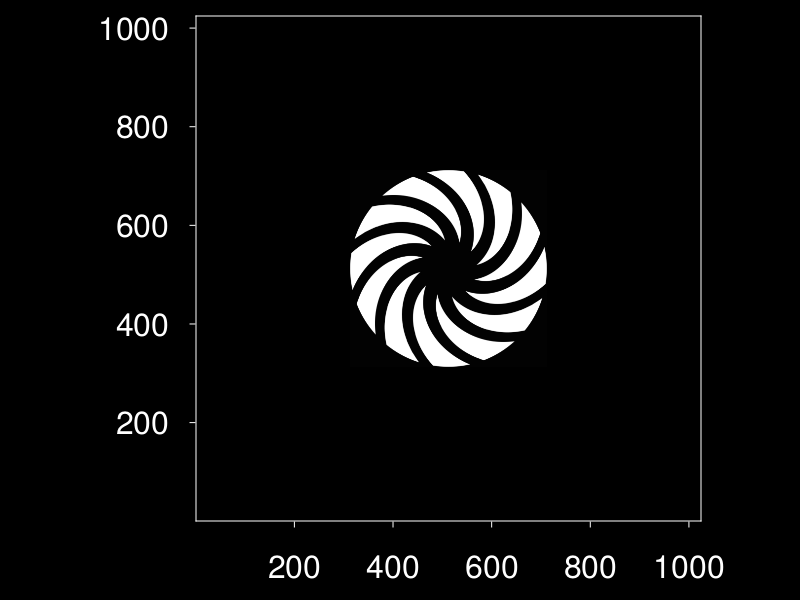

In [63]:
img_path = "../images/spiral.png"
img_size = (400, 400)
ap_img = aperture(N...; img_path=img_path, img_size=img_size)
heatmap(ap_img)

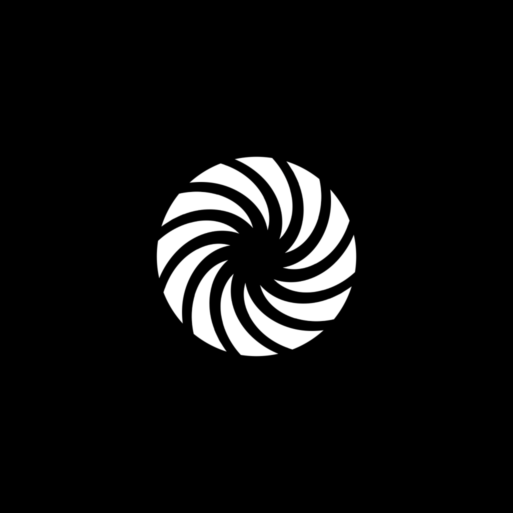

In [64]:
E = reshape(Ev, 1, 1, length(λ)) .* ap_img
u = CoherentField2D(L, N, λ, E, gpu=gpu)
get_color(u)

In [65]:
plan = plan_fft!(u)

CUFFT in-place complex forward plan for 1024×1024×81 CuArray of ComplexF32

In [66]:
d = 1e-3
H = propagatorTF(u, d, gpu=gpu);

In [67]:
let
    z = Observable(0.0)
    n_step = 60
    framerate = 60

    fig = Figure(resolution=N)
    ax = Axis(
        fig[1, 1], 
        title=@lift("z = $(lpad(string(round(1000*$z, digits = 1)), 5, ' ')) mm"),
        titlefont="JuliaMono"
    ) 
    # hm = heatmap!(ax, 1000u.x, 1000u.y, I, colormap=:bone, colorrange=(0, 8))
    img = image!(ax, 1000u.x, 1000u.y, get_color(u))
    fig

    record(fig, "test.gif", 1:n_step; framerate=framerate) do n
        propTF!(u.E, H, plan)
        img[3] = get_color(u)
        z[] = z[] + d
        n % 60 == 0 && @show n
    end
end

n = 60

"test.gif"